In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

np.random.seed(42)

# Data

In [3]:
train_data_dir = "chest_xray/train"
test_data_dir = "chest_xray/test"
val_data_dir = "chest_xray/val"

# data normalization
idg = ImageDataGenerator(rescale=1./255)

train_generator = idg.flow_from_directory(train_data_dir, color_mode = 'grayscale',
                                          target_size =(128, 128),
                                          batch_size = 32,
                                          class_mode = 'binary')
test_generator = idg.flow_from_directory(test_data_dir, color_mode = 'grayscale',
                                        target_size =(128,128),
                                        batch_size = 32,
                                        class_mode = 'binary')
valid_generator = idg.flow_from_directory(val_data_dir, color_mode = 'grayscale',
                                         target_size = (128, 128),
                                         batch_size = 32,
                                         class_mode = 'binary')

# Create the datasets
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [54]:
print(train_images.shape)
test_images.shape

(32, 128, 128, 1)


(32, 128, 128, 1)

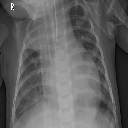

In [55]:
# Preview of an image
array_to_img(train_images[5])

In [56]:
train_generator.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

# Models

##### model 1

In [5]:
np.random.seed(42)
model_1 = Sequential()

model_1.add(Conv2D(32,1, activation = 'relu', input_shape = (128, 128, 1)))
model_1.add(MaxPool2D(pool_size = 2))
model_1.add(Conv2D(32, 1, activation = 'relu'))
model_1.add(MaxPool2D(pool_size = 3))
model_1.add(Flatten())
model_1.add(Dense(100, activation = 'relu'))
model_1.add(Dense(1, activation='sigmoid'))

In [58]:
print(model_1.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 128, 128, 32)      64        
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 64, 64, 32)        1056      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 21, 21, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 14112)             0         
_________________________________________________________________
dense_10 (Dense)             (None, 100)               1411300   
_________________________________________________________________
dense_11 (Dense)             (None, 1)                

In [6]:
model_1.compile(optimizer = 'adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [7]:
callback = EarlyStopping(monitor='val_loss', patience=5, min_delta=3)

In [61]:
np.random.seed(42)
results_1 =model_1.fit(train_generator, validation_data=valid_generator, epochs=3, batch_size=32, callbacks=callback)

Epoch 1/3
163/163 [==============================] - 49s 296ms/step - loss: 0.4200 - accuracy: 0.8019 - val_loss: 0.3741 - val_accuracy: 0.6875
Epoch 2/3
163/163 [==============================] - 48s 294ms/step - loss: 0.1222 - accuracy: 0.9564 - val_loss: 0.5531 - val_accuracy: 0.6250
Epoch 3/3
163/163 [==============================] - 48s 296ms/step - loss: 0.0962 - accuracy: 0.9657 - val_loss: 0.2650 - val_accuracy: 0.8750


In [11]:
def visualize_training_results(results):
    history = results.history
    plt.figure()
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure()
    plt.plot(history['val_accuracy'])
    plt.plot(history['accuracy'])
    plt.legend(['val_accuracy', 'accuracy'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()

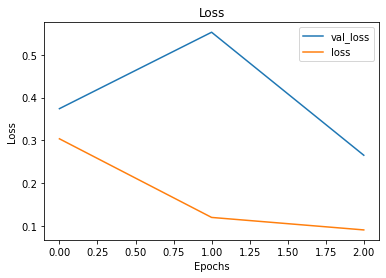

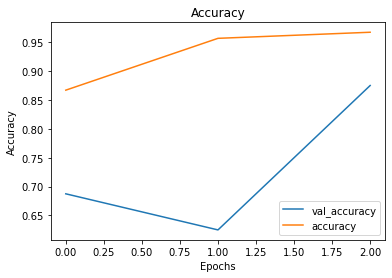

In [63]:
visualize_training_results(results_1)

In [13]:
predictions_1 = model_1.predict([test_images])

In [15]:
print(np.argmax(predictions_1[0]))

0


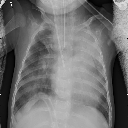

In [18]:
array_to_img(test_images[0])

##### model 2

In [30]:
np.random.seed(42)
model_2 = Sequential()

model_2.add(Conv2D(64,1, activation = 'relu', input_shape = (128, 128, 1)))
model_2.add(MaxPool2D(pool_size = 2))
model_2.add(Conv2D(64, 1, activation = 'relu'))
model_2.add(MaxPool2D(pool_size = 3))
model_2.add(Flatten())
model_2.add(Dense(100, activation = 'relu'))
model_2.add(Dense(1, activation='sigmoid'))

model_2.compile(optimizer = 'adam', loss='binary_crossentropy', metrics = ['accuracy'])
results_2 =model_2.fit(train_generator, validation_data=valid_generator, epochs=3, batch_size=32, callbacks=callback)

Epoch 1/3
163/163 [==============================] - 54s 327ms/step - loss: 0.4557 - accuracy: 0.7971 - val_loss: 0.3542 - val_accuracy: 0.8125
Epoch 2/3
163/163 [==============================] - 53s 326ms/step - loss: 0.1215 - accuracy: 0.9562 - val_loss: 0.7864 - val_accuracy: 0.6250
Epoch 3/3
163/163 [==============================] - 53s 323ms/step - loss: 0.0957 - accuracy: 0.9627 - val_loss: 0.3687 - val_accuracy: 0.8125


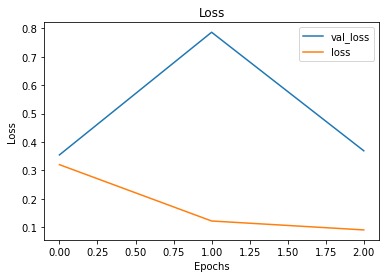

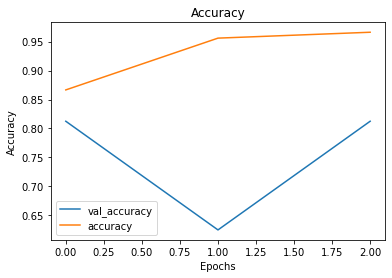

In [31]:
visualize_training_results(results_2)

##### model 3

In [36]:
np.random.seed(42)
model_3 = Sequential()

model_3.add(Conv2D(64,1, activation = 'relu', input_shape = (128, 128, 1)))
model_3.add(MaxPool2D(pool_size = 2))
model_3.add(Conv2D(32, 1, activation = 'relu'))
model_3.add(MaxPool2D(pool_size = 3))
model_3.add(Conv2D(32, 1, activation = 'relu'))
model_3.add(MaxPool2D(pool_size = 3))
model_3.add(Flatten())
model_3.add(Dense(100, activation = 'relu'))
model_3.add(Dense(1, activation='sigmoid'))

model_3.compile(optimizer = 'adam', loss='binary_crossentropy', metrics = ['accuracy'])
results_3 =model_3.fit(train_generator, validation_data=valid_generator, epochs=3, batch_size=32, callbacks=callback)

Epoch 1/3
163/163 [==============================] - 52s 315ms/step - loss: 0.5667 - accuracy: 0.7514 - val_loss: 1.1540 - val_accuracy: 0.5625
Epoch 2/3
163/163 [==============================] - 76s 468ms/step - loss: 0.2926 - accuracy: 0.8681 - val_loss: 0.4858 - val_accuracy: 0.7500
Epoch 3/3
163/163 [==============================] - 84s 515ms/step - loss: 0.1422 - accuracy: 0.9493 - val_loss: 0.3774 - val_accuracy: 0.8125


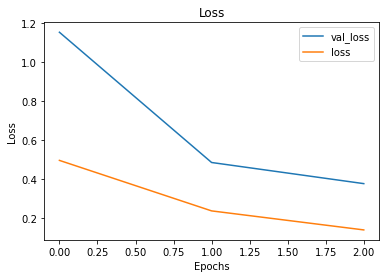

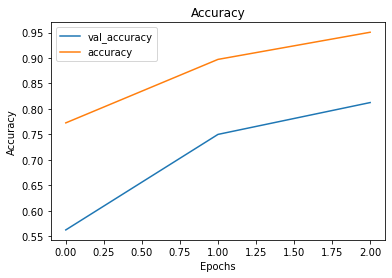

In [37]:
visualize_training_results(results_3)

# Model Evaluations

In [64]:
model_1.evaluate(test_generator)

20/20 [==============================] - 5s 239ms/step - loss: 0.5863 - accuracy: 0.8045


[0.5863237380981445, 0.8044871687889099]

In [32]:
model_2.evaluate(test_generator)

20/20 [==============================] - 4s 207ms/step - loss: 0.7527 - accuracy: 0.7885


[0.7527151703834534, 0.7884615659713745]

In [38]:
model_3.evaluate(test_generator)

20/20 [==============================] - 4s 204ms/step - loss: 0.5128 - accuracy: 0.8301


[0.5128467679023743, 0.8301281929016113]

In [47]:
# how do I eveluate the wrong classifications to try to figure out why these were misclassified
#why do my results keep changing

# Best Model Tuning